<a href="https://colab.research.google.com/github/GabrielLias/QE-data/blob/main/QuantumEspresso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inicio

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/'My Drive'/q-e.zip ./
!unzip q-e.zip
import os
os.environ['PATH'] = "/content/q-e/bin:"+os.environ['PATH']
!pip install ase

!export ASE_ESPRESSO_COMMAND="/content/q-e/bin/pw.x -in PREFIX.pwi > PREFIX.pwo"

!apt-get install -y libmkl-scalapack-lp64
!apt-get install -y libmkl-blacs-openmpi-lp64
!apt-get install -y libfftw3-3

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: q-e/upflib/read_fhi.o   
  inflating: q-e/upflib/write_upf_new.f90  
  inflating: q-e/upflib/init_us_2_base.f90  
  inflating: q-e/upflib/upf_parallel_include.mod  
  inflating: q-e/upflib/upfconv.f90  
  inflating: q-e/upflib/make.depend  
  inflating: q-e/upflib/upf_to_internal.f90  
 extracting: q-e/upflib/upf_auxtools.mod  
 extracting: q-e/upflib/read_upf_v1_module.mod  
  inflating: q-e/upflib/read_upf_v1.o  
  inflating: q-e/upflib/upf_parallel_include.f90  
  inflating: q-e/upflib/init_us_1.o  
 extracting: q-e/upflib/upf_to_internal.mod  
  inflating: q-e/upflib/splinelib.f90  
 extracting: q-e/upflib/upf_kinds.mod  
  inflating: q-e/upflib/virtual_v2.x  
  inflating: q-e/upflib/uspp.o       
 extracting: q-e/upflib/atom.mod     
   creating: q-e/XClib/
  inflating: q-e/XClib/qe_funct_corr_lda_lsda.f90  
  inflating: q-e/XClib/xc_beef_interface.o  
  inflating: q-e/XClib/qe_dft_list.f90  
   creating: q-

#FeTi2S4 con spin

##Reanudar sección

In [2]:
%cd /content/
!cp /content/drive/'My Drive'/FeTi2S4_us.zip ./
!unzip FeTi2S4_us.zip

/content
Archive:  FeTi2S4_us.zip
   creating: FeTi2S4_us/
  inflating: FeTi2S4_us/FeTi2S4_us.restart_k  
  inflating: FeTi2S4_us/FeTi2S4_us.mix1  
   creating: FeTi2S4_us/FeTi2S4_us.save/
  inflating: FeTi2S4_us/FeTi2S4_us.save/charge-density.dat  
  inflating: FeTi2S4_us/FeTi2S4_us.save/data-file-schema.xml  
  inflating: FeTi2S4_us/FeTi2S4_us.save/paw.txt  
  inflating: FeTi2S4_us/sulfuro_us.scf.out  
  inflating: FeTi2S4_us/sulfuro_us.scf.in  
   creating: FeTi2S4_us/pp_us/
  inflating: FeTi2S4_us/pp_us/S.pbe-nl-rrkjus_psl.1.0.0.UPF  
  inflating: FeTi2S4_us/pp_us/Ti.pbe-spn-rrkjus_psl.1.0.0.UPF  
  inflating: FeTi2S4_us/pp_us/Fe.pbe-spn-kjpaw_psl.0.2.1.UPF  
  inflating: FeTi2S4_us/FeTi2S4_us.restart_scf  
  inflating: FeTi2S4_us/FeTi2S4_us.wfc1  
  inflating: FeTi2S4_us/FeTi2S4-Takadashi.cif  
  inflating: FeTi2S4_us/FeTi2S4_us.save/wfcdw28.dat  
  inflating: FeTi2S4_us/FeTi2S4_us.save/wfcup1.dat  
  inflating: FeTi2S4_us/FeTi2S4_us.save/wfcdw25.dat  
  inflating: FeTi2S4_us/FeTi

In [ ]:
from ase.io import read
metal = read('/content/FeTi2S4_us/FeTi2S4-Takadashi.cif')
print(metal)

Atoms(symbols='Fe2Ti4S8', pbc=True, cell=[[5.969, 0.0, 0.0], [0.0, 3.426, 0.0], [-0.27139316019448856, 0.0, 11.265731523190123]], spacegroup_kinds=...)


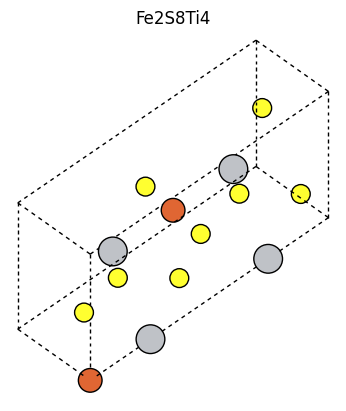

In [ ]:
import ase.io.espresso
from ase import Atoms
from ase.visualize import view
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

# input_file = ase.io.espresso.read_espresso_in('si.scf.in')

# atoms = Atoms(input_file)
view(metal,viewer='x3d')

fig, ax = plt.subplots()
plot_atoms(metal, ax, radii=0.3, rotation=('45x,45y,90z'))
ax.set_title(metal.get_chemical_formula())
ax.set_axis_off()
plt.show()

##Descarga de datos de la primera vez

In [ ]:
%cd /content/
!mkdir FeTi2S4_us
%cd /content/FeTi2S4_us
!mkdir pp_us
%cd /content/FeTi2S4_us/pp_us
!wget http://pseudopotentials.quantum-espresso.org/upf_files/Ti.pbe-spn-rrkjus_psl.1.0.0.UPF
!wget http://pseudopotentials.quantum-espresso.org/upf_files/S.pbe-nl-rrkjus_psl.1.0.0.UPF
!wget http://pseudopotentials.quantum-espresso.org/upf_files/Fe.pbe-spn-kjpaw_psl.0.2.1.UPF

/content
/content/FeTi2S4_us
/content/FeTi2S4_us/pp_us
--2024-02-09 15:11:30--  http://pseudopotentials.quantum-espresso.org/upf_files/Ti.pbe-spn-rrkjus_psl.1.0.0.UPF
Resolving pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)... 51.77.118.191
Connecting to pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)|51.77.118.191|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1721154 (1.6M)
Saving to: ‘Ti.pbe-spn-rrkjus_psl.1.0.0.UPF’

Ti.pbe-spn-rrkjus_p 100%[===================>]   1.64M  2.75MB/s    in 0.6s    

2024-02-09 15:11:31 (2.75 MB/s) - ‘Ti.pbe-spn-rrkjus_psl.1.0.0.UPF’ saved [1721154/1721154]

--2024-02-09 15:11:31--  http://pseudopotentials.quantum-espresso.org/upf_files/S.pbe-nl-rrkjus_psl.1.0.0.UPF
Resolving pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)... 51.77.118.191
Connecting to pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)|51.77.1

##Calculo scf

In [ ]:
%cd /content/FeTi2S4_us/

/content/FeTi2S4_us


In [ ]:
! /content/q-e/bin/pw.x -in sulfuro_us.scf.in > sulfuro_us.scf.out

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP 255


## Calculo no-scf para bandas

MCL(a=3.426, b=5.969, c=11.269, alpha=88.62)
  Variant name: MCL
  Special point names: GACDD1EHH1H2MM1M2XYY1Z
  Default path: GYHCEM1AXH1,MDZ,YD

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    A   0.5000  0.5000  0.0000
    C   0.0000  0.5000  0.5000
    D   0.5000  0.0000  0.5000
    D1  0.5000  0.0000 -0.5000
    E   0.5000  0.5000  0.5000
    H   0.0000  0.4939  0.5225
    H1  0.0000  0.5061  0.4775
    H2  0.0000  0.4939 -0.4775
    M   0.5000  0.4939  0.5225
    M1  0.5000  0.5061  0.4775
    M2  0.5000  0.4939 -0.4775
    X   0.0000  0.5000  0.0000
    Y   0.0000  0.0000  0.5000
    Y1  0.0000  0.0000 -0.5000
    Z   0.5000  0.0000  0.0000



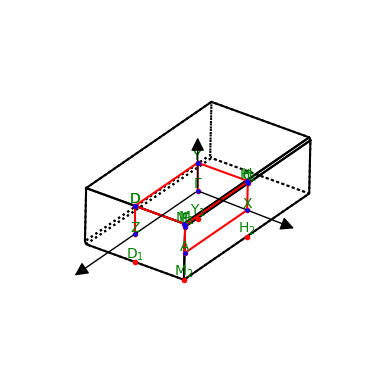

<Axes3D: >

In [ ]:
lat_metal = metal.cell.get_bravais_lattice()
print(lat_metal.description())
lat_metal.plot_bz(show=True)

In [ ]:
! /content/q-e/bin/pw.x -in sulfuro_us.bands.in > sulfuro_us.bands.out

*Spin Up*

In [ ]:
! /content/q-e/bin/bands.x -in sulfuro_us.bandup.in > sulfuro_us.bandup.out

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DENORMAL


In [ ]:
!grep -e 'Fermi energy' -e estimate /content/FeTi2S4_us/sulfuro_us.scf.out

     estimated scf accuracy    <          3.2E-09 Ry
     estimated scf accuracy    <          2.8E-09 Ry
     estimated scf accuracy    <          3.0E-09 Ry
     the Fermi energy is    10.8679 ev
     estimated scf accuracy    <          8.5E-10 Ry


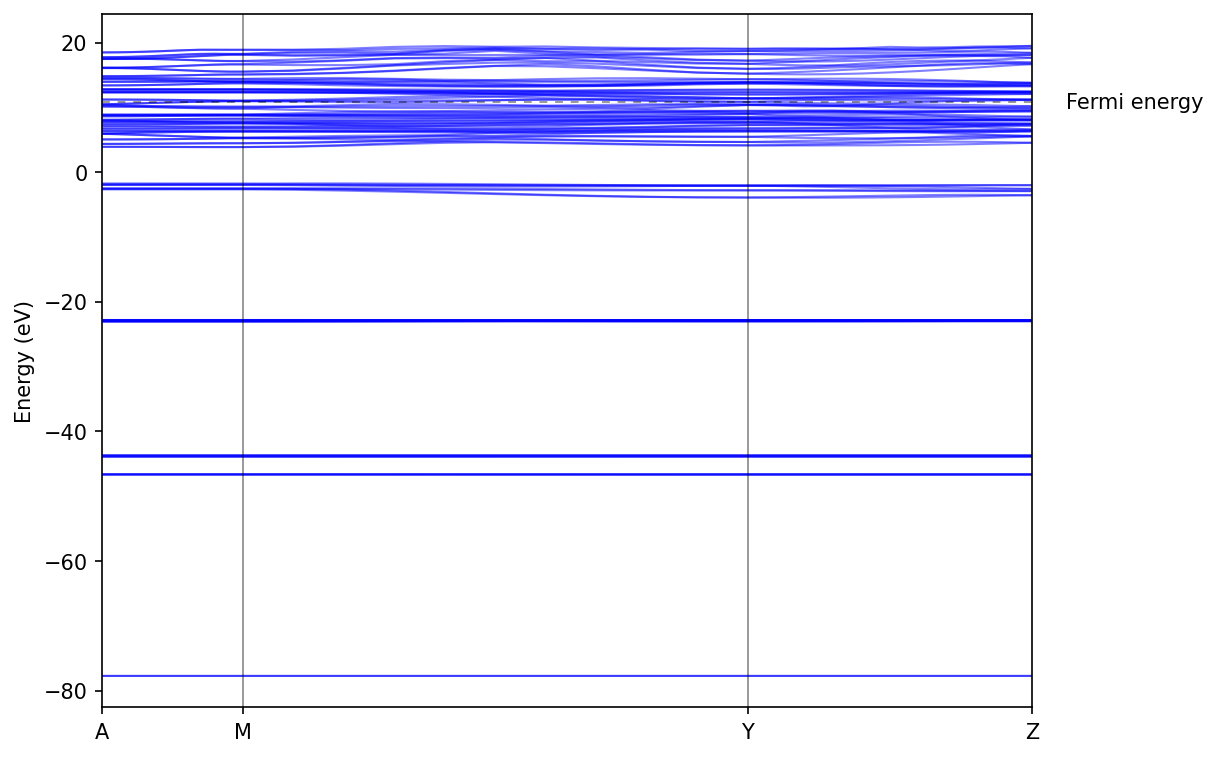

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["figure.figsize"]=(8, 6)

# load data
data = np.loadtxt('/content/FeTi2S4_us/sulfuro_bands_up.dat.gnu')

k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))

for band in range(len(bands)):
    plt.plot(k, bands[band, :], linewidth=1, alpha=0.5, color='blue')
plt.xlim(min(k), max(k))

# Fermi energy
plt.axhline(10.8679, linestyle=(0, (5, 5)), linewidth=0.75, color='k', alpha=0.5)
# High symmetry k-points (check bands_pp.out)
plt.axvline(0.2770, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(1.2726, linewidth=0.75, color='k', alpha=0.5)
# plt.axvline(1.8329, linewidth=0.75, color='k', alpha=0.5)
# text labels
plt.xticks(ticks= [0, 0.2770, 1.2726, 1.8329], \
           labels=['A', 'M', 'Y', 'Z'])
plt.ylabel("Energy (eV)")
plt.text(1.9, 9.8, 'Fermi energy')
plt.show()

*Spin Down*

In [ ]:
! /content/q-e/bin/bands.x -in sulfuro_us.bandown.in > sulfuro_us.bandown.out

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DENORMAL


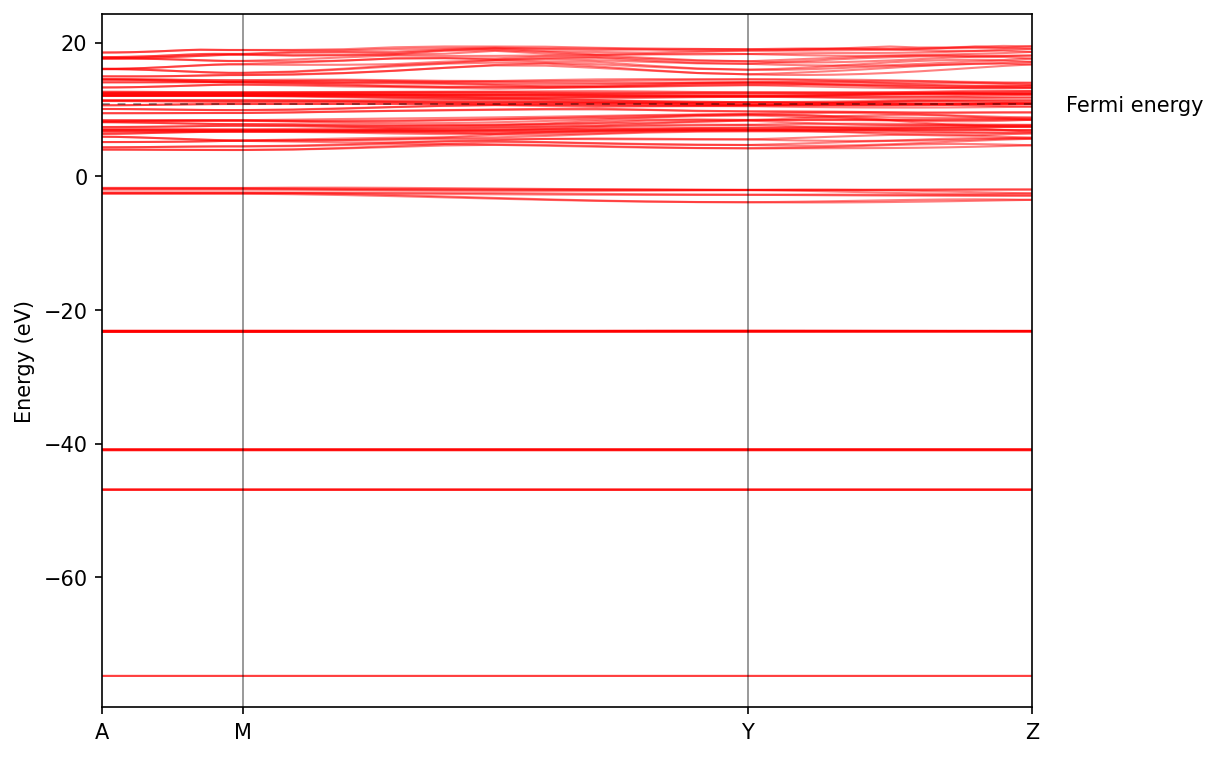

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["figure.figsize"]=(8, 6)

# load data
data = np.loadtxt('/content/FeTi2S4_us/sulfuro_bands_down.dat.gnu')

k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))

for band in range(len(bands)):
    plt.plot(k, bands[band, :], linewidth=1, alpha=0.5, color='red')
plt.xlim(min(k), max(k))

# Fermi energy
plt.axhline(10.8679, linestyle=(0, (5, 5)), linewidth=0.75, color='k', alpha=0.5)
# High symmetry k-points (check bands_pp.out)
plt.axvline(0.2770, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(1.2726, linewidth=0.75, color='k', alpha=0.5)
# plt.axvline(1.8329, linewidth=0.75, color='k', alpha=0.5)
# text labels
plt.xticks(ticks= [0, 0.2770, 1.2726, 1.8329], \
           labels=['A', 'M', 'Y', 'Z'])
plt.ylabel("Energy (eV)")
plt.text(1.9, 9.8, 'Fermi energy')
plt.show()

Ahora voy a gráficar ambas graficas en un mismo plot

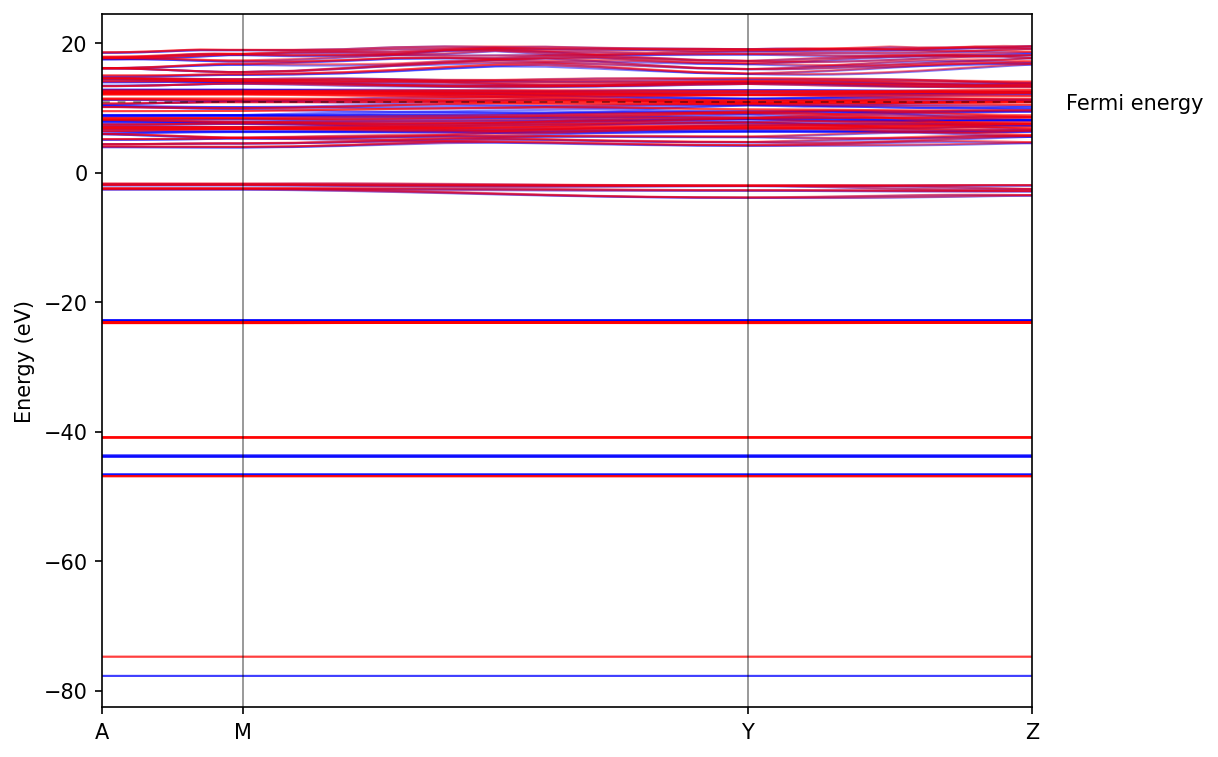

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["figure.figsize"]=(8, 6)

# load data up
data_up = np.loadtxt('/content/FeTi2S4_us/sulfuro_bands_up.dat.gnu')

k_up = np.unique(data_up[:, 0])
bands_up = np.reshape(data_up[:, 1], (-1, len(k_up)))

for band in range(len(bands_up)):
    plt.plot(k_up, bands_up[band, :], linewidth=1, alpha=0.5, color='blue')
plt.xlim(min(k_up), max(k_up))

# load data down
data_down = np.loadtxt('/content/FeTi2S4_us/sulfuro_bands_down.dat.gnu')

k_down = np.unique(data_down[:, 0])
bands_up = np.reshape(data_down[:, 1], (-1, len(k_down)))

for band in range(len(bands_up)):
    plt.plot(k_down, bands_up[band, :], linewidth=1, alpha=0.5, color='red')
# plt.xlim(min(k_down), max(k_down))


# Fermi energy
plt.axhline(10.8679, linestyle=(0, (5, 5)), linewidth=0.75, color='k', alpha=0.5)
# High symmetry k-points (check bands_pp.out)
plt.axvline(0.2770, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(1.2726, linewidth=0.75, color='k', alpha=0.5)
# plt.axvline(1.8329, linewidth=0.75, color='k', alpha=0.5)
# text labels
plt.xticks(ticks= [0, 0.2770, 1.2726, 1.8329], \
           labels=['A', 'M', 'Y', 'Z'])
plt.ylabel("Energy (eV)")
plt.text(1.9, 9.8, 'Fermi energy')
# plt.legend(loc='best')
plt.show()

## DOS

In [ ]:
%cd /content/FeTi2S4_us/

/content/FeTi2S4_us


In [ ]:
! /content/q-e/bin/pw.x -in sulfuro_us.nscf.in > sulfuro_us.nscf.out

Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
STOP 255


#Guardar


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/
!zip -r /content/drive/'My Drive'/FeTi2S4_us.zip FeTi2S4_us

/content
updating: FeTi2S4_us/ (stored 0%)
updating: FeTi2S4_us/FeTi2S4_us.restart_k (deflated 94%)
updating: FeTi2S4_us/FeTi2S4_us.mix1 (deflated 42%)
updating: FeTi2S4_us/FeTi2S4_us.save/ (stored 0%)
updating: FeTi2S4_us/FeTi2S4_us.save/charge-density.dat (deflated 77%)
updating: FeTi2S4_us/FeTi2S4_us.save/data-file-schema.xml (deflated 96%)
updating: FeTi2S4_us/FeTi2S4_us.save/paw.txt (deflated 93%)
updating: FeTi2S4_us/sulfuro_us.scf.out (deflated 83%)
updating: FeTi2S4_us/sulfuro_us.scf.in (deflated 67%)
updating: FeTi2S4_us/pp_us/ (stored 0%)
updating: FeTi2S4_us/pp_us/S.pbe-nl-rrkjus_psl.1.0.0.UPF (deflated 65%)
updating: FeTi2S4_us/pp_us/Ti.pbe-spn-rrkjus_psl.1.0.0.UPF (deflated 66%)
updating: FeTi2S4_us/pp_us/Fe.pbe-spn-kjpaw_psl.0.2.1.UPF (deflated 67%)
updating: FeTi2S4_us/FeTi2S4_us.restart_scf (deflated 64%)
updating: FeTi2S4_us/FeTi2S4_us.wfc1 (deflated 7%)
updating: FeTi2S4_us/FeTi2S4-Takadashi.cif (deflated 69%)
updating: FeTi2S4_us/FeTi2S4_us.save/wfcdw28.dat (deflated